In [19]:
from model import Data
# import plotly.graph_objects as go
# import plotly.express as px

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Importación de dataset local
SMOTE_DATA = "./sample_data/smote_data.csv"

smote_data = pd.read_csv(SMOTE_DATA)
smote_data

,fecha_de_muestreo,estaciones,ph,temperatura_c,color_upc,turbiedad_unt,solidos_totales_mg_sst_l,solidos_suspendidos_totales,solidos_disueltos_mg_sd_l,demanda_bioquimica_de_oxigeno,...,fosforo_total_mg_p_l,fosfatos_mg_po4_l,sulfatos_mg_so4_l,cadmio_total_mg_cd_l,cromo_total_mg_cr_l,niquel_total_mg_ni_l,plomo_total_mg_pb_l,coliformes_totales_nmp_100,coliformes_fecales_nmp_100,contaminacion_metalica
0,1990-01-10 00:00:00,ANTES INTERCEPTOR SUR,7.200000,22.022321,135.280069,134.044514,358.000000,271.000000,87.000000,33.000000,...,0.268925,0.010000,18.000000,0.205591,0.165057,0.000000,0.000000,2.410000e+05,2.410000e+05,bajo
1,1990-01-10 00:00:00,PUENTE HORMIGUERO,7.200000,22.022321,135.280069,134.044514,464.000000,360.000000,104.000000,39.000000,...,0.268925,0.010000,21.000000,0.205591,0.165057,0.000000,0.000000,2.410000e+05,2.410000e+04,bajo
2,1990-01-10 00:00:00,ANTES RIO OVEJAS,6.700000,22.022321,135.280069,134.044514,143.000000,65.000000,78.000000,2.100000,...,0.268925,0.010000,18.000000,0.205591,0.165057,0.075543,0.148743,2.410000e+04,2.410000e+07,bajo
3,1990-01-10 00:00:00,PASO DE LA BOLSA,7.300000,22.022321,135.280069,134.044514,359.000000,171.000000,88.000000,33.000000,...,0.268925,0.010000,16.000000,0.205591,0.165057,0.000000,0.148743,2.410000e+04,2.410000e+05,bajo
4,1990-01-10 00:00:00,PASO DE LA BALSA,7.100000,22.022321,135.280069,134.044514,380.000000,293.000000,87.000000,1.000000,...,0.268925,0.010000,22.000000,0.205591,0.165057,0.075543,0.148743,2.410000e+05,9.550000e+03,medio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4631,NaN,NaN,6.252666,21.875387,123.718354,10.846690,110.557491,4.839721,105.717770,1.025244,...,0.054880,0.008524,22.100767,0.005688,0.026681,0.015218,0.016010,2.540418e+01,2.300000e+01,viable
4632,NaN,NaN,6.709747,21.544489,31.779564,25.853932,101.989380,21.473450,80.515930,1.962285,...,0.039256,0.049655,14.084199,0.018765,0.092736,0.043718,0.032776,2.400000e+03,2.400000e+02,viable
4633,NaN,NaN,7.001152,16.028793,44.913620,8.670055,105.861792,25.929744,79.932048,1.702303,...,0.146672,0.038184,23.271339,0.001000,0.003000,0.005000,0.010000,2.409942e+03,2.409942e+03,viable
4634,NaN,NaN,7.370166,15.973757,55.131213,36.429556,193.243074,61.787979,131.455095,3.031491,...,0.100807,0.022895,29.093524,0.001000,0.003000,0.005000,0.010000,2.410000e+04,2.410000e+04,viable


# Gráficas del análisis predictivo

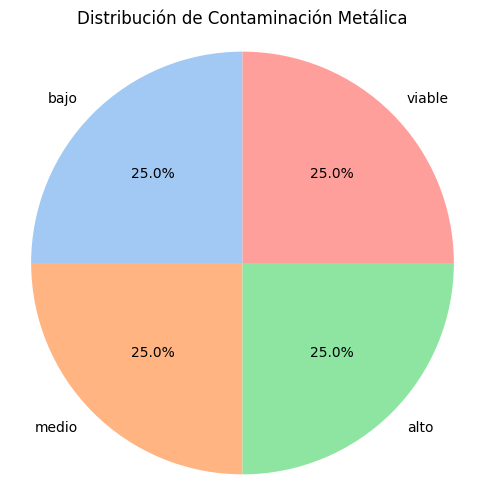

In [15]:
contaminacion_counts = smote_data['contaminacion_metalica'].value_counts()

# Grafica Circular
plt.figure(figsize=(6, 6))
plt.pie(contaminacion_counts, labels=contaminacion_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribución de Contaminación Metálica')
plt.axis('equal')
plt.show()

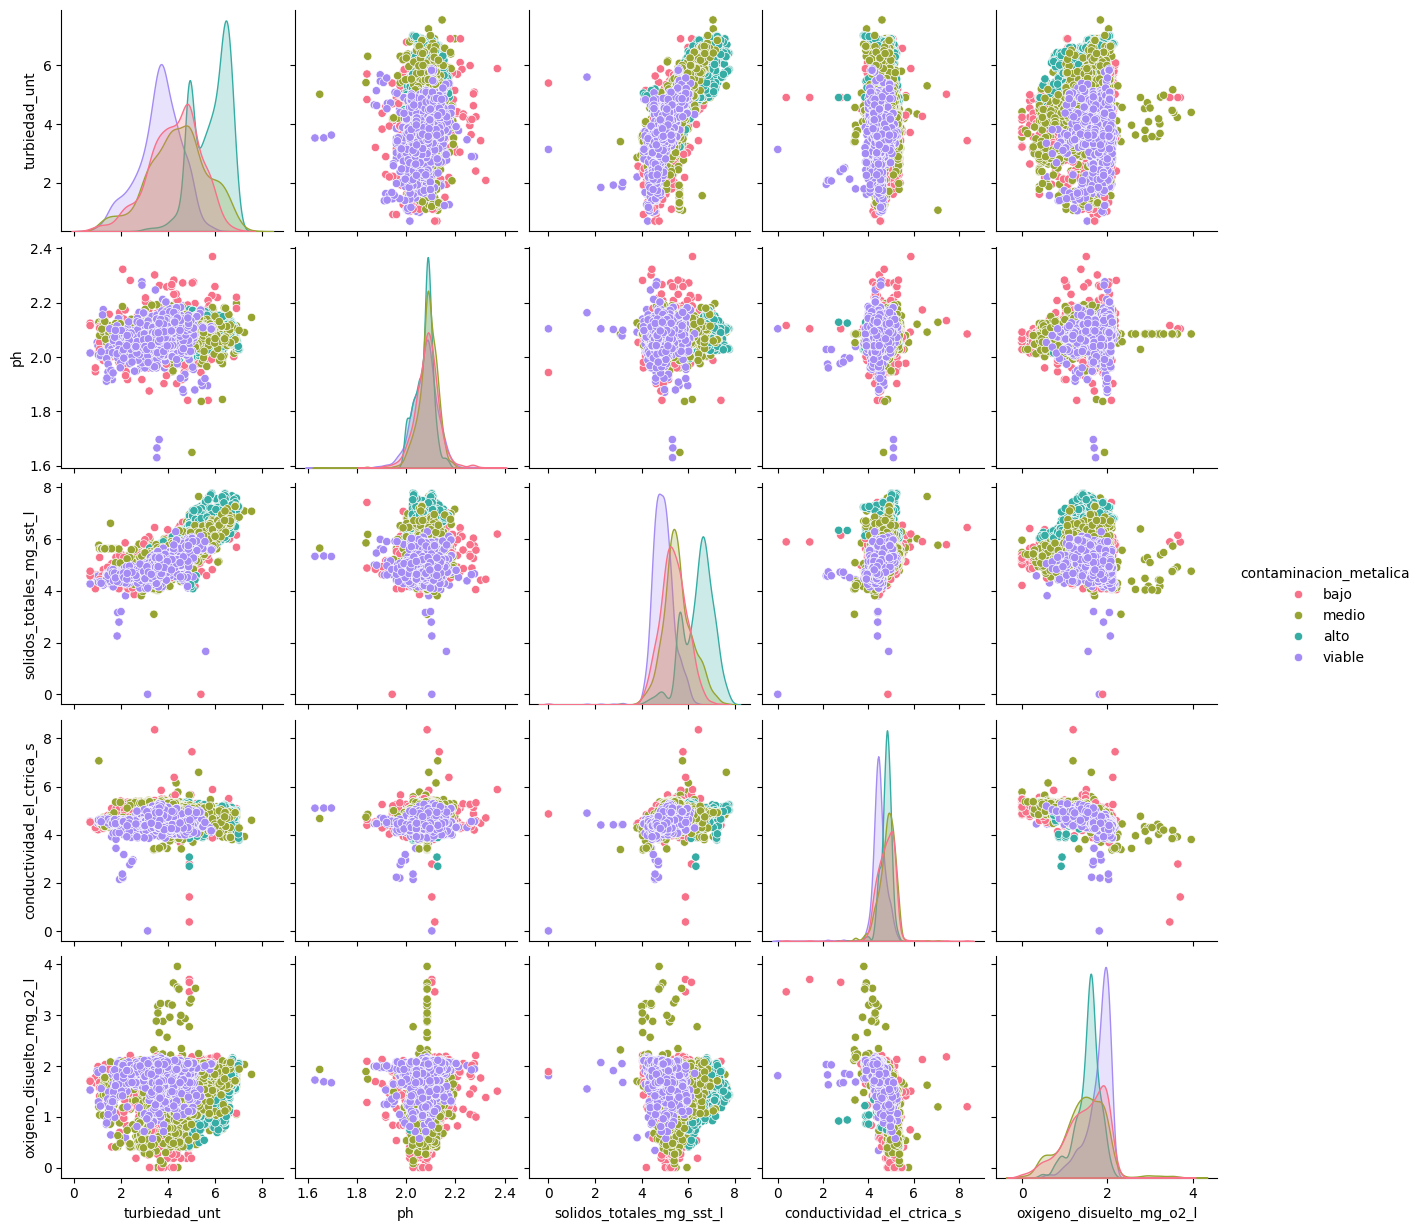

In [16]:
# Selecciona las columnas deseadas para el análisis
selected_columns = [Data.TURBIEDAD_UNT, Data.PH, Data.SOLIDOS_TOTALES_MG_SST_L,
                    Data.CONDUCTIVIDAD_EL_CTRICA_S, Data.OXIGENO_DISUELTO_MG_O2_L]

# Aplica el escalamiento logarítmico a las columnas seleccionadas
log_scaled_data = smote_data[selected_columns].apply(np.log1p)  # np.log1p(x) es equivalente a log(1 + x)

# Añade la columna de estaciones para el hue
log_scaled_data[Data.CONTAMINACION_METALICA] = smote_data[Data.CONTAMINACION_METALICA]

# Crear el pairplot con los datos escalados logarítmicamente y categorizados por estaciones
sns.pairplot(log_scaled_data, diag_kind='kde', hue=Data.CONTAMINACION_METALICA, palette='husl')

# Mostrar el gráfico
plt.show()

# Contaminacion metalica, con otro parametros a traves del tiempo


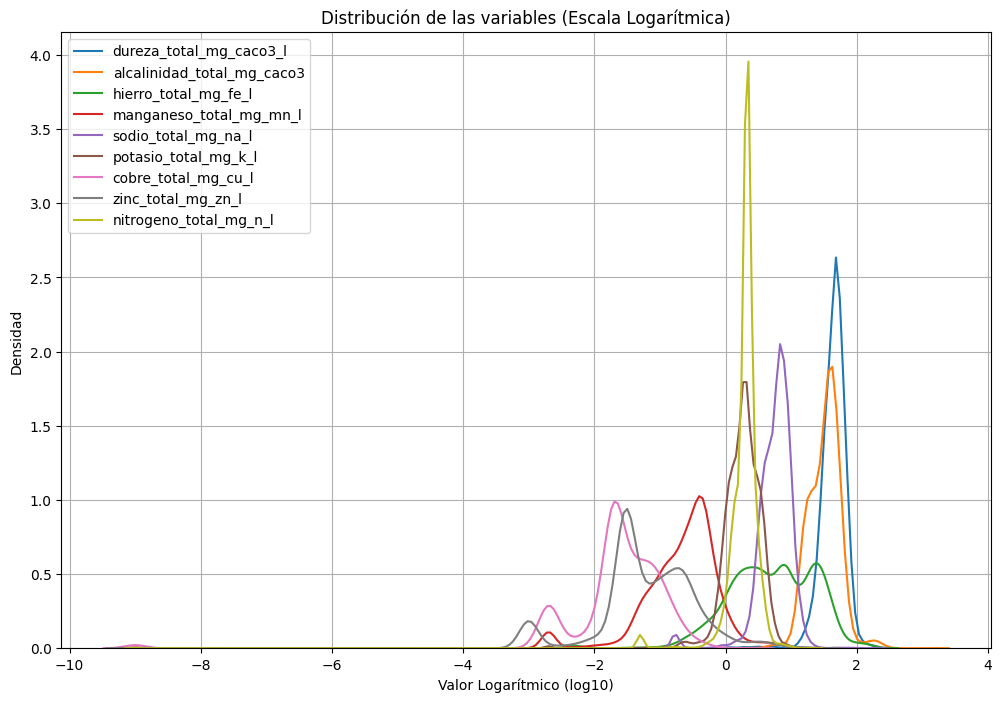

In [ ]:
# Select relevant columns for KDE plot
variables = [Data.DUREZA_TOTAL_MG_CACO3_L, Data.ALCALINIDAD_TOTAL_MG_CACO3, Data.HIERRO_TOTAL_MG_FE_L,
             Data.MANGANESO_TOTAL_MG_MN_L, Data.SODIO_TOTAL_MG_NA_L, Data.POTASIO_TOTAL_MG_K_L, Data.COBRE_TOTAL_MG_CU_L,
             Data.ZINC_TOTAL_MG_ZN_L, Data.NITROGENO_TOTAL_MG_N_L]

# Crear la figura
plt.figure(figsize=(12, 8))

# Aplicar transformación logarítmica y crear la gráfica de KDE
for var in variables:
    # Agregar una pequeña constante para evitar valores cero o negativos
    transformed_data = np.log10(smote_data[var] + 1e-9)
    sns.kdeplot(transformed_data, label=var)

# Títulos y etiquetas
plt.title('Distribución de las variables (Escala Logarítmica)')
plt.xlabel('Valor Logarítmico (log10)')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

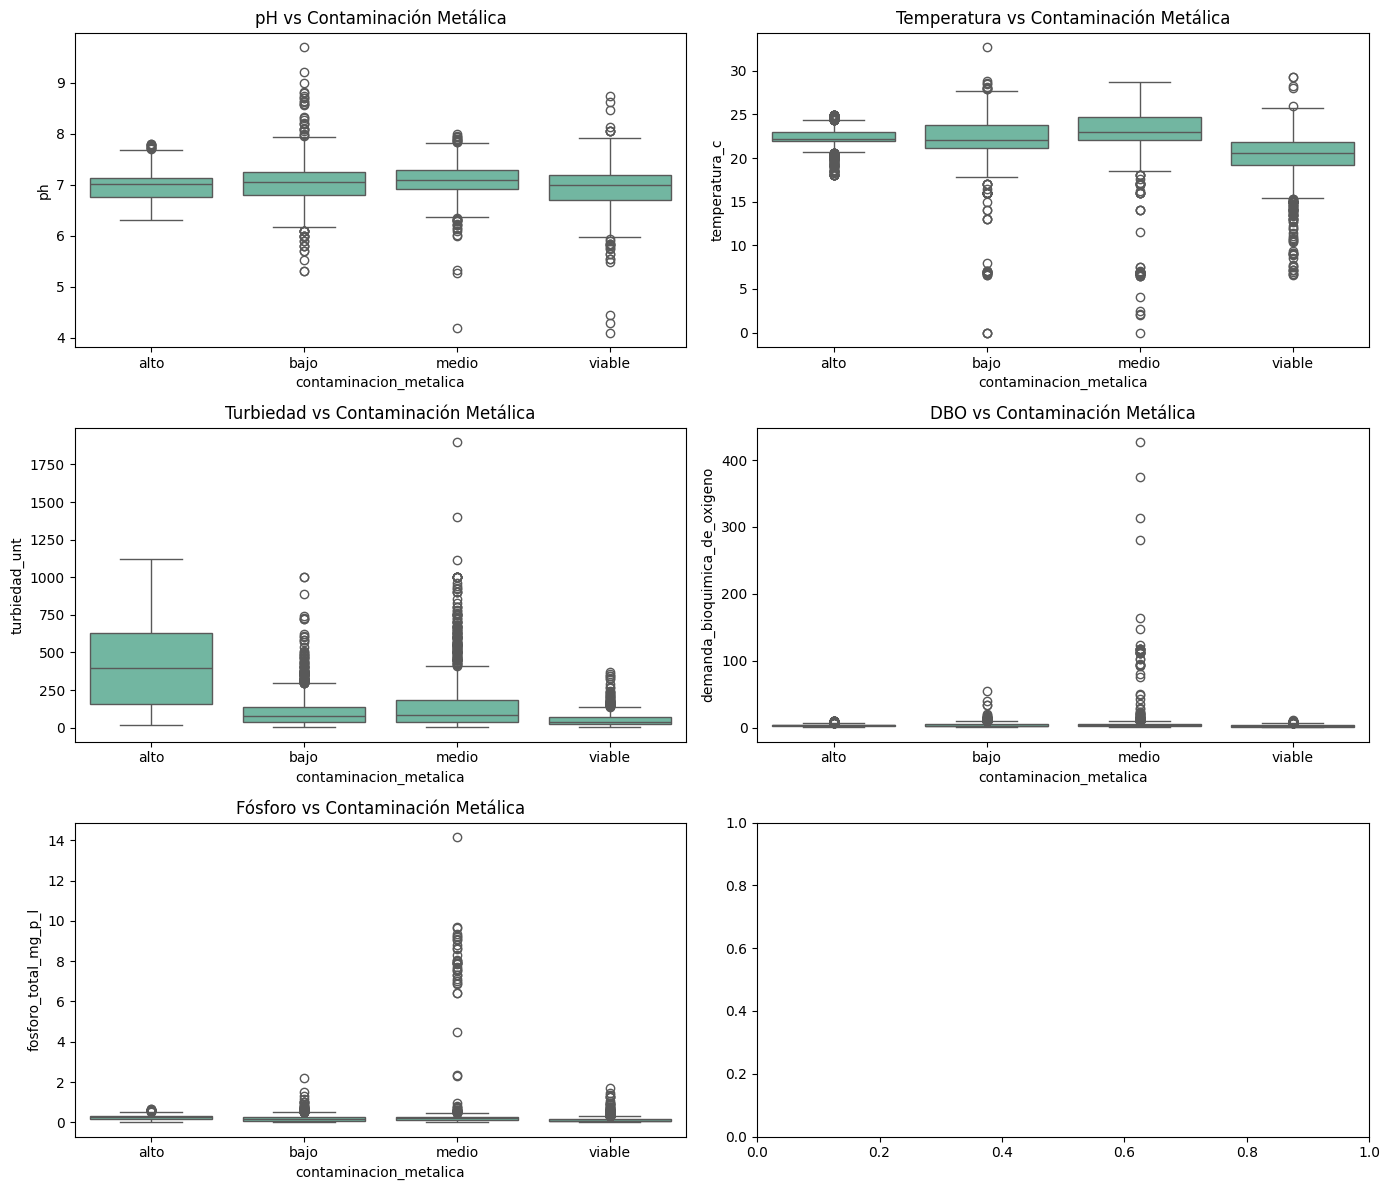

In [ ]:
sns.set_palette("Set2")

# Convert 'contaminacion_metalica' to a categorical type for better plotting
smote_data[Data.CONTAMINACION_METALICA] = smote_data[Data.CONTAMINACION_METALICA ].astype('category')

# List of variables for the boxplots
metales = ['ph', 'temperatura_c', 'turbiedad_unt', 'demanda_bioquimica_de_oxigeno', 'fosforo_total_mg_p_l']

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# Titles for the subplots
titles = ['pH vs Contaminación Metálica', 'Temperatura vs Contaminación Metálica',
          'Turbiedad vs Contaminación Metálica', 'DBO vs Contaminación Metálica',
          'Fósforo vs Contaminación Metálica']

# Loop to create the boxplots for each variable
for i, metal in enumerate(metales):
    sns.boxplot(ax=axes[i//2, i%2], x='contaminacion_metalica', y=metal, data=smote_data)
    axes[i//2, i%2].set_title(titles[i])

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()

C:\Users\overd\AppData\Local\Temp\ipykernel_16812\2180421195.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=smote_data, x='log_cobre_total_mg_cu_l', y='contaminacion_metalica', inner='box', palette='Dark2')


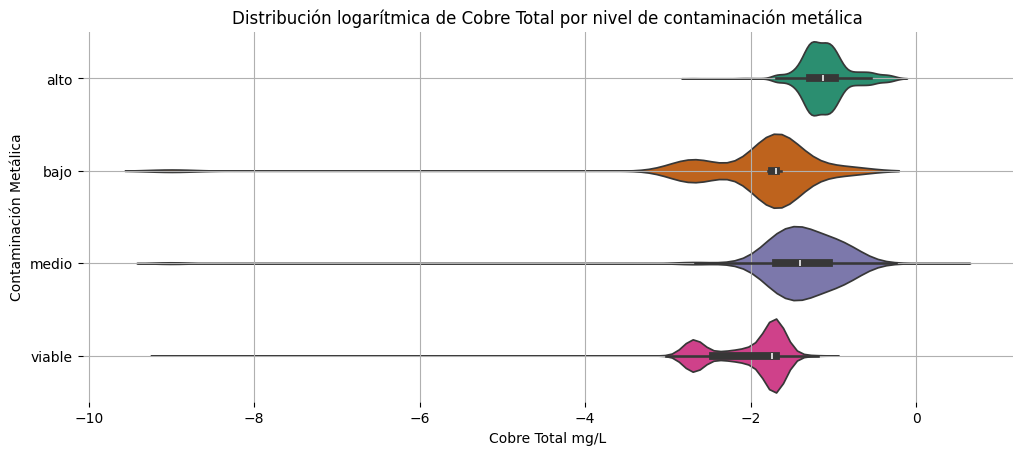

C:\Users\overd\AppData\Local\Temp\ipykernel_16812\2180421195.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(smote_data, x='turbiedad_unt', y='contaminacion_metalica', inner='box', palette='Dark2')


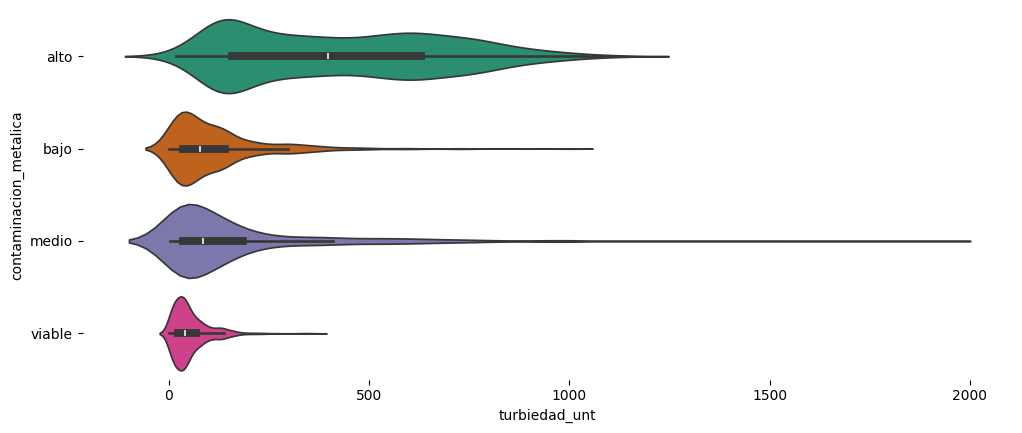

In [ ]:
figsize = (12, 1.2 * len(smote_data['contaminacion_metalica'].unique()))

# Crear la figura
plt.figure(figsize=figsize)

# Aplicar la transformación logarítmica (agregar una pequeña constante para evitar valores cero)
smote_data['log_cobre_total_mg_cu_l'] = np.log10(smote_data['cobre_total_mg_cu_l'] + 1e-9)

# Crear el violinplot con 'log_cobre_total_mg_cu_l' en el eje x y 'contaminacion_metalica' en el eje y
sns.violinplot(data=smote_data, x='log_cobre_total_mg_cu_l', y='contaminacion_metalica', inner='box', palette='Dark2')

# Ajustar el gráfico eliminando algunos bordes para hacerlo más claro
sns.despine(top=True, right=True, bottom=True, left=True)

# Mostrar el gráfico
plt.title('Distribución logarítmica de Cobre Total por nivel de contaminación metálica')
plt.xlabel('Cobre Total mg/L')
plt.ylabel('Contaminación Metálica')
plt.grid(True)
plt.show()

figsize = (12, 1.2 * len(smote_data['contaminacion_metalica'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(smote_data, x='turbiedad_unt', y='contaminacion_metalica', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# Grafica en 3D de relación entre los sólidos suspendidos, la contaminación metálica, y el cobre total varían juntos

Relación de patrones complejos entre las variables.

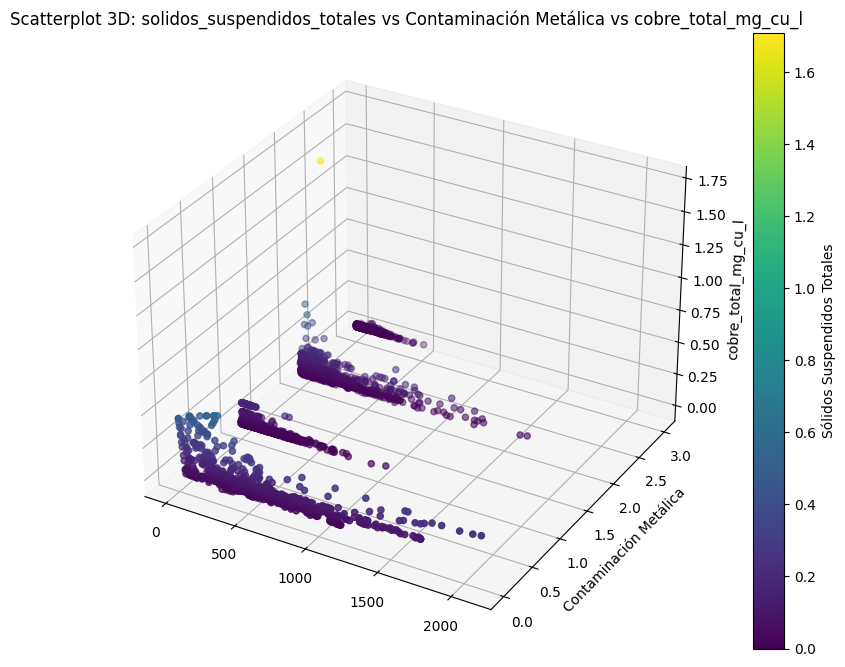

In [ ]:
from sklearn.preprocessing import LabelEncoder

TARGET = Data.CONTAMINACION_METALICA  # Asegúrate de que esta columna esté en tu dataframe

# Crear una copia del DataFrame para trabajar
df = smote_data.copy()

y = df[TARGET]  # Variable objetivo (categoría de contaminación)

# ** Codificar las etiquetas como números si es necesario **
label_encoder = LabelEncoder()

z_lbl = 'cobre_total_mg_cu_l'
x_lbl = 'solidos_suspendidos_totales'

# Definir las variables para el scatter plot
z = smote_data[z_lbl]
x = smote_data[x_lbl]
y = label_encoder.fit_transform(y)

# Crear la figura y el gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Crear el scatter plot
scatter = ax.scatter(x, y, z, c=z, cmap='viridis')

# Añadir etiquetas y título
ax.set_ylabel('Contaminación Metálica')
ax.set_zlabel(z_lbl)
ax.set_title(f'Scatterplot 3D: {x_lbl} vs Contaminación Metálica vs {z_lbl}')

# Añadir la barra de color
fig.colorbar(scatter, ax=ax, label='Sólidos Suspendidos Totales')

# Mostrar el gráfico
plt.show()